In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [16]:
input = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation='relu')(input)
x = layers.MaxPooling2D((2, 2))(input)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Flatten()(x)

output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input, outputs=output)

In [17]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5986 - accuracy: 0.4206 - val_loss: 1.4001 - val_accuracy: 0.5041
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3257 - accuracy: 0.5277 - val_loss: 1.2450 - val_accuracy: 0.5586
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2167 - accuracy: 0.5706 - val_loss: 1.1213 - val_accuracy: 0.6044
Epoch 4/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1423 - accuracy: 0.5996 - val_loss: 1.0783 - val_accuracy: 0.6184
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0923 - accuracy: 0.6155 - val_loss: 1.0319 - val_accuracy: 0.6370
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0542 - accuracy: 0.6284 - val_loss: 1.0170 - val_accuracy: 0.6398
Epoch 7/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0223 - accuracy: 0.6429 - val_loss: 1.0511 - val_ac

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.9392 - accuracy: 0.6872 - 991ms/epoch - 3ms/step

Test accuracy: 0.6872000098228455


1/1 [==============================] - 0s 87ms/step


<ipython-input-20-9e424383b264>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = int(labels[i])


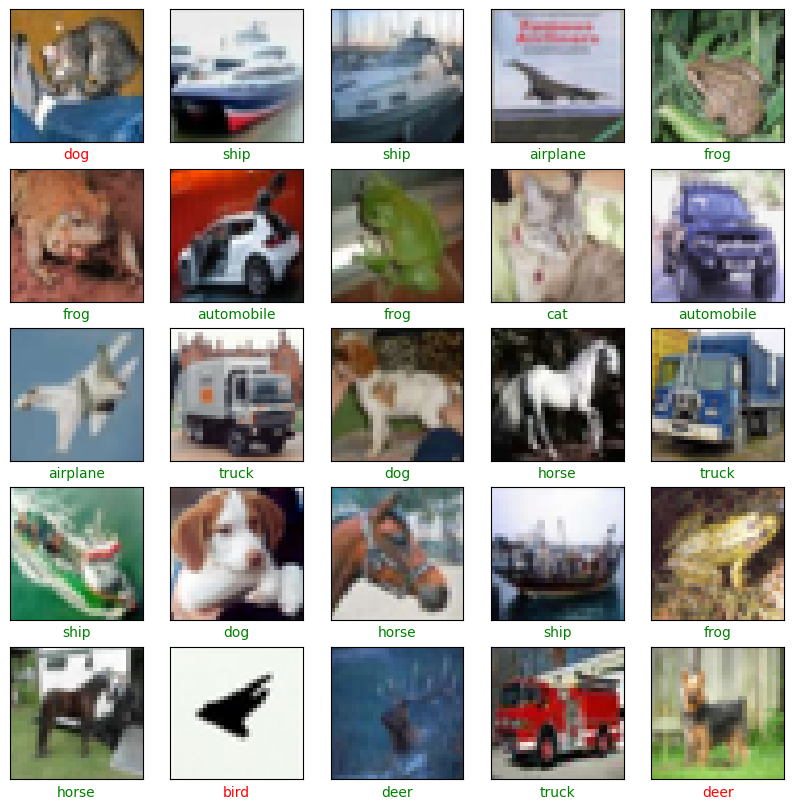

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = int(labels[i])
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel(f'{class_names[predicted_label]}', color=color)
    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

num_images = 25
test_images_subset = test_images[:num_images]
true_labels_subset = test_labels[:num_images]

predictions = model.predict(test_images_subset)
plot_images(test_images_subset, true_labels_subset, predictions)
